In [17]:
# Pathを追加するためのスクリプト
import sys
sys.path.append("..")

import config
if str(config.SCRIPTS_DIR) not in sys.path:
    sys.path.append(str(config.SCRIPTS_DIR))

import importlib

In [24]:
# pip 系のモジュール
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas library for data manipulation and analysis
import optuna
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 自作のモジュール
import model_optimizer
importlib.reload(model_optimizer)

<module 'model_optimizer' from 'C:\\Users\\kazuki\\Documents\\GF_contest\\scripts\\model_optimizer.py'>

In [31]:
df1 = pd.read_csv(config.RAW_DATA_DIR/'Mot_A_rel_2.csv')
df2 = pd.read_csv(config.RAW_DATA_DIR/'Mot_B_rel_1.csv')

# df1が既に定義されていると仮定
X = df1[['d_alpha', 'h_c', 'r', 'w_t', 'l_t', 'w_o', 'dxIB', 'gamma']]
y = df1[['T', 'TR', 'm_Cu', 'm_mag', 'cos_phi', 'VM', 'Temp']]

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y['TR'], test_size=0.2, random_state=42)

In [ ]:
# 最適なハイパーパラメータを使用してモデルを学習
best_xgb = model_optimizer.optimize_xgb(X_train, y_train)
# best_svr = model_optimizer.optimize_svr(X_train, y_train)
best_gp = model_optimizer.optimize_gpr(X_train, y_train)


Best R2: -3.4078404473853587
Best R2: 0.2902200985052888
Best R2: 0.2902200985052888
Best R2: 0.2902200985052888
Best R2: 0.2902200985052888
Best R2: 0.2902200985052888
Best R2: 0.2902200985052888


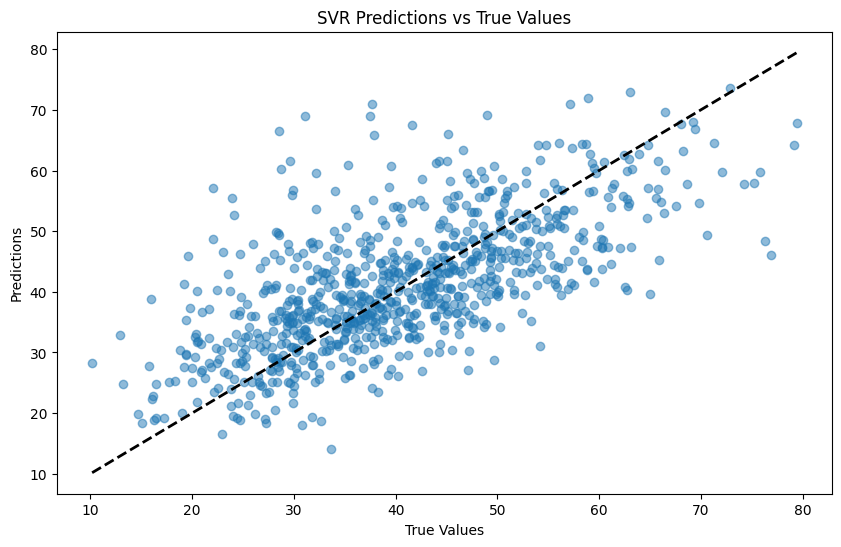

In [30]:
best_model = best_gp
Y_test = y_test
# テストデータに対する予測
y_pred = best_model.predict(X_test)

# プロット
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('SVR Predictions vs True Values')
plt.show()

In [19]:
# 予測値と真値
y_true = Y_test
y_pred = best_model.predict(X_test)

# R²決定係数
r2 = r2_score(y_true, y_pred)

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_true, y_pred)

print(f'R²: {r2}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

R²: 0.9667738334938295
RMSE: 8.076018500740796
MAE: 6.148449463039127
